In [2]:
import numpy as np
from sklearn.datasets import load_digits
import gtda.homology
import gtda.diagrams
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler
from topconv import topfiltlearn

In [7]:
%load_ext autoreload
%autoreload 2

In [11]:
#Load data
from sklearn.preprocessing import OneHotEncoder
digits = load_digits()
X = np.reshape(digits.data, (len(digits.data),8,8))
y = digits.target


kNN Results:  [0.34390651 0.31552588 0.30217028]
Gradient Boosting Results:  [0.37562604 0.3572621  0.37228715]


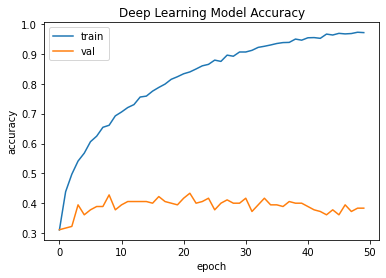

In [13]:
# Baseline : Not Using any filters
topfiltlearn(X,y,[])

kNN Results:  [0.34223706 0.31552588 0.30217028]
Gradient Boosting Results:  [0.37562604 0.3572621  0.3706177 ]


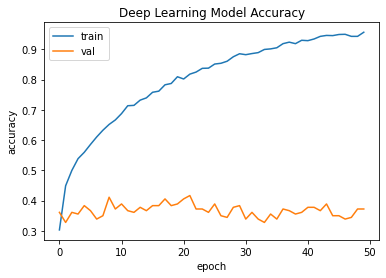

In [35]:
# Using some preset 4x4 filters
from scipy.ndimage import gaussian_filter, sobel, uniform_filter, laplace
A = np.zeros((4,4))
filters = [gaussian_filter(A,sigma=1), sobel(A),uniform_filter(A),laplace(A)]
topfiltlearn(X,y,filters)


kNN Results:  [0.39232053 0.46744574 0.46577629]
Gradient Boosting Results:  [0.6360601  0.59432387 0.59098497]


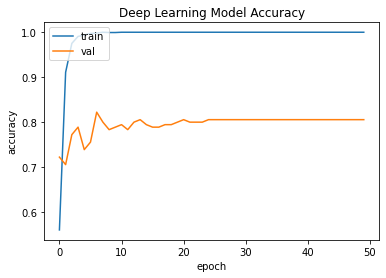

In [37]:
#Using PCA eigenfilters
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import PCA 
patches = []
for im in X:
    patches.extend(extract_patches_2d(im,(4,4)))
#print(np.shape(patches))
patches = np.reshape(patches,(44925,16))
pca = PCA(n_components=16)
pca.fit(patches)
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#print(pca.explained_variance_ratio_)
M = np.asarray(pca.components_[:10]).T
filters = []
for i in range(16):
    weights = np.random.uniform(size=10)
    weights = weights/sum(weights)
    filters.append(np.reshape(np.matmul(M,weights),(4,4)))

topfiltlearn(X,y,filters)

kNN Results:  [0.5542571  0.58931553 0.61769616]
Gradient Boosting Results:  [0.60434057 0.64607679 0.69449082]


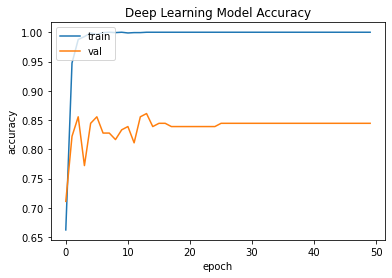

In [39]:
#Using random filters
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

filters = []
for i in range(16):
    filters.append(np.reshape(sample_spherical(1,16),(4,4)))

topfiltlearn(X,y,filters)


kNN Results:  [0.49582638 0.59933222 0.51419032]
Gradient Boosting Results:  [0.61602671 0.65275459 0.70450751]


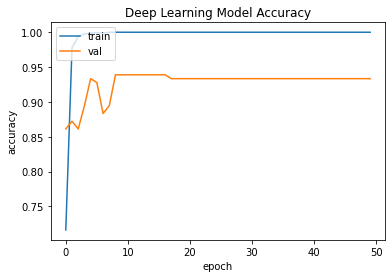

In [44]:
#Using random filters
def sample_spherical(npoints, ndim=3):
    vec = np.random.randn(ndim, npoints)
    vec /= np.linalg.norm(vec, axis=0)
    return vec

filters = []
for i in range(50):
    filters.append(np.reshape(sample_spherical(1,25),(5,5)))

topfiltlearn(X,y,filters)
